In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/5_660 Ellyse Perry Photos and Premium (1).jpg')
img.shape

(612, 414, 3)

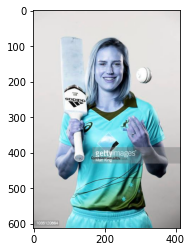

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(612, 414)

In [5]:
gray

array([[214, 215, 215, ..., 213, 213, 213],
       [215, 215, 215, ..., 213, 213, 213],
       [215, 215, 215, ..., 214, 214, 214],
       ...,
       [159, 159, 160, ..., 116, 115, 115],
       [159, 159, 160, ..., 116, 115, 115],
       [159, 159, 160, ..., 116, 115, 115]], dtype=uint8)

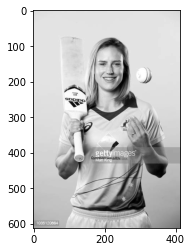

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[163, 111, 101, 101]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(163, 111, 101, 101)

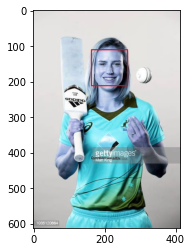

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

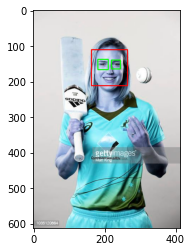

In [10]:
#This code is copy pasted from opencv Harr cascade documantation
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

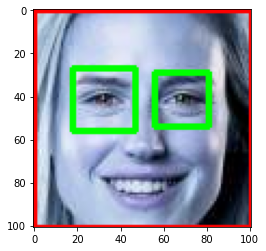

In [11]:
#roi-region of intrest
plt.imshow(roi_color,cmap='gray')

In [12]:
#function for cropping the images
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

# Original Image

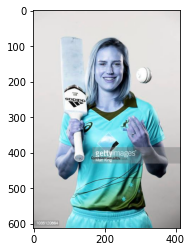

In [13]:
original_image = cv2.imread('./test_images/5_660 Ellyse Perry Photos and Premium (1).jpg')
plt.imshow(original_image)

# Cropped Image

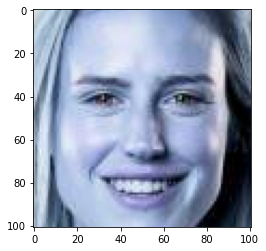

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/5_660 Ellyse Perry Photos and Premium (1).jpg')
plt.imshow(cropped_image)

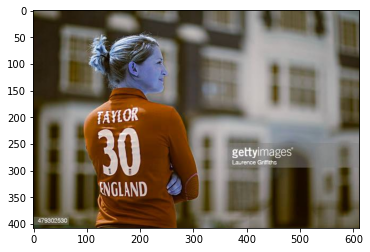

In [15]:
org_image_obstructed = cv2.imread('./test_images/2_565 Sarah Taylor Cricket Photos and.jpg')
plt.imshow(org_image_obstructed)

In [25]:
#if face and eyes was not detected clearly then function return nothing.
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/OIP (27).jpeg')
cropped_image_no_2_eyes

In [31]:
#creating new folder called crpped for storing cropped images
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [32]:
#all the dirctory of my dataset folder
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [33]:
img_dirs

['./dataset/Ellyse_Perry',
 './dataset/Holly_Ferling',
 './dataset/Jhulan_Goswami',
 './dataset/Mithali_Raj',
 './dataset/Sarah_Jane_Taylor']

In [34]:
# if cropped folder is exists then first delete it and recreting it
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# Loop Through each and every images

In [35]:
cropped_image_dirs = []
#dictionary for storing each and every cropped images path
cricketer_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    #accessing the folder of path with last index
    cricketer_name = img_dir.split('/')[-1]
    print(cricketer_name)
    
    cricketer_file_names_dict[cricketer_name] = []
    
    for entry in os.scandir(img_dir):
         # calling the function for cropping each image
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + cricketer_name
            #here once again we check if cropped folder not exists we create first
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            
            #make the name for each cropped images with cricketer name and count variable with .png extension
            #for example
            #Ellyse_Perry1.png
            #Ellyse_Perry2.png.......
            cropped_file_name = cricketer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #save the cropped images in dataset/cricketer folder/cropped images name
            cv2.imwrite(cropped_file_path, roi_color)
            cricketer_file_names_dict[cricketer_name].append(cropped_file_path)
            count += 1    

Ellyse_Perry
Generating cropped images in folder:  ./dataset/cropped/Ellyse_Perry
Holly_Ferling
Generating cropped images in folder:  ./dataset/cropped/Holly_Ferling
Jhulan_Goswami
Generating cropped images in folder:  ./dataset/cropped/Jhulan_Goswami
Mithali_Raj
Generating cropped images in folder:  ./dataset/cropped/Mithali_Raj
Sarah_Jane_Taylor
Generating cropped images in folder:  ./dataset/cropped/Sarah_Jane_Taylor


In [36]:
#source stack overflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # calculating coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # array reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

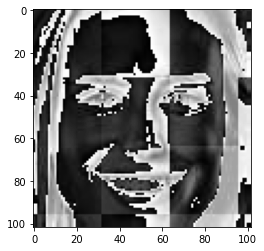

In [37]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

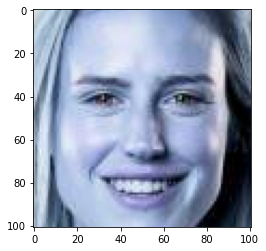

In [38]:
plt.imshow(cropped_image,cmap='gray')

In [39]:
cricketer_file_names_dict

{'Ellyse_Perry': ['./dataset/cropped/Ellyse_Perry/Ellyse_Perry1.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry2.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry3.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry4.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry5.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry6.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry7.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry8.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry9.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry10.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry11.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry12.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry13.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry14.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry15.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry16.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry17.png',
  './dataset/cropped/Ellyse_Perry/Ellyse_Perry18.png',
  '

In [40]:
#cresting numbers for our y
class_dict={}
count=0
for cricketer_name in cricketer_file_names_dict.keys():
    class_dict[cricketer_name]=count
    count+=1
class_dict

{'Ellyse_Perry': 0,
 'Holly_Ferling': 1,
 'Jhulan_Goswami': 2,
 'Mithali_Raj': 3,
 'Sarah_Jane_Taylor': 4}

In [41]:
X=[]
y=[]
for cricketer_name,training_files in cricketer_file_names_dict.items():
    for training_image in training_files:
        #now resizing gthe images for oue classifier
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        #now vertically stacking this two images using np.vstack 
        combined_image=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #scalled_raw_img.reshape(32*32*3,1) here 3 bacause it is 3 color image
        #scalled_img_har.reshape(32*32,1) here not 3 because it is simple wavelet transformed image
        X.append(combined_image)
        y.append(class_dict[cricketer_name])       

In [42]:
len(X[7])

4096

In [43]:
#here 4096 pixel is our 32*32*3+32*32
32*32*3+32*32

4096

In [44]:
X[0]

array([[113],
       [102],
       [ 88],
       ...,
       [ 10],
       [  8],
       [234]], dtype=uint8)

In [45]:
#reshaping X with float because sklearn is giving lot of warnings with int numbers
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(206, 4096)

In [46]:
X[0]

array([113., 102.,  88., ...,  10.,   8., 234.])

# Training the model

# SVM

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [49]:
pipe=Pipeline([('scaler',MinMaxScaler()),('svc',SVC(kernel='rbf',C=3))])

In [50]:
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7692307692307693

In [51]:
len(X_test)

52

In [52]:
class_dict

{'Ellyse_Perry': 0,
 'Holly_Ferling': 1,
 'Jhulan_Goswami': 2,
 'Mithali_Raj': 3,
 'Sarah_Jane_Taylor': 4}

In [53]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.67      0.40      0.50         5
           2       1.00      0.50      0.67         8
           3       0.86      1.00      0.93        25
           4       0.57      0.50      0.53         8

    accuracy                           0.77        52
   macro avg       0.73      0.65      0.66        52
weighted avg       0.78      0.77      0.75        52



# GridSearch CV for Getting Best Model with its best Parameters

In [54]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,3,2,5,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.694409,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.552258,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.687742,{'logisticregression__C': 1}


In [57]:
best_estimators['svm'].score(X_test,y_test)

0.8461538461538461

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.5961538461538461

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7692307692307693

In [60]:
best_clf=best_estimators['svm']

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  0,  1],
       [ 3,  2,  0,  0,  0],
       [ 0,  0,  7,  0,  1],
       [ 0,  0,  0, 24,  1],
       [ 1,  0,  0,  1,  6]], dtype=int64)

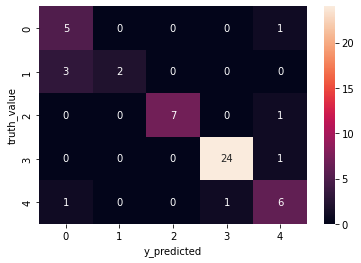

In [62]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('truth_value')
plt.show()

In [63]:
class_dict

{'Ellyse_Perry': 0,
 'Holly_Ferling': 1,
 'Jhulan_Goswami': 2,
 'Mithali_Raj': 3,
 'Sarah_Jane_Taylor': 4}

# Saving The Model 

In [64]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# Saving Class Dictionary

In [65]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))